In [ ]:
def testing(model, classes):

    results = pd.DataFrame([[]], columns = ['Class', 'Accuracy', 'Recall', 'Precision', 'F_score'])

    model.eval()
    y_pred1 = torch.tensor([])
    y_target1 = torch.tensor([])
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for _ in range(len(classes))]
        n_class_samples = [0 for _ in range(len(classes))]
        n_class_true_positives = [0 for _ in range(len(classes))]
        n_class_preds = [0 for _ in range(len(classes))]
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
             
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            y_pred1 = torch.cat((predicted, y_pred1), dim=0)
            y_target1 = torch.cat((labels, y_target1), dim=0)
            
            for i in range(len(images)):
                label = labels[i]
                pred = predicted[i]
                if label == pred:
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
                n_class_preds[pred] +=1                
                n_class_true_positives[pred] += int(pred == label)
                
                

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network: {acc} %')
        recall_arr = []
        precision_arr = []
        f_score_arr = []

        for i in range(len(classes)):
            precision = n_class_true_positives[i] / n_class_preds[i]
            recall = n_class_true_positives[i] /n_class_samples[i]
            f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            recall_arr.append(round(recall, 4))
            precision_arr.append(round(precision, 4))
            f_score_arr.append(round(f_score, 4))

            results.loc[len(results.index)] = [classes[i], n_class_correct[i] / n_class_samples[i], recall, precision, f_score] 
            
            print(f'Class: {classes[i]}')
            print(f'Accuracy: {100.0 * n_class_correct[i] / n_class_samples[i]} %')
            print('---')
        mcr = MulticlassRecall(num_classes=len(classes), average=None)
        mcp = MulticlassPrecision(num_classes=len(classes), average=None)

        print("\n Recall using torchmet", mcr(y_pred1, y_target1))
        print("Recall", recall_arr)

        print("\n Precision:", mcp(y_pred1, y_target1))
        print("Precision:", precision_arr)
        print(f_score_arr)

In [ ]:
F = nn.functional
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

       
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()  

            running_loss = 0.0
            running_corrects = 0

            
            for inputs, labels in dataloaders[phase]:
                inputs =  torch.tensor(inputs).to(device)
                labels = torch.tensor(labels).to(device)

                with torch.set_grad_enabled(phase == 'train'):
                    outputs,_ = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

    
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))


    model.load_state_dict(best_model_wts)
    return model

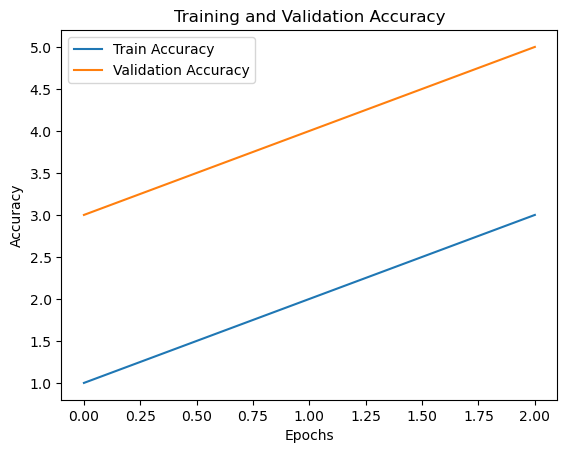

In [3]:
import matplotlib.pyplot as plt

train_acc = [1, 2, 3]
valid_acc = [3, 4, 5]


epochs = list(range(0, len(train_acc)))
    
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, valid_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plot
plt.show()

[[1, 2, 3], [4, 5, 6]]